# Introduction
Principal Component Analysis (PCA) is a popular statistical tool for reducing the dimension of a data into a specified smaller dimension, compressing data, visualize data (usually in 2D or 3D), and construct new features from the original data. The goal behind PCA is to be able to work with a low dimensional data set that captures large proportion of the variation found in the original higly dimensional complex data. As the name may hint, PCA is used to find the principal components of the data that explain most of the variation and hence allows us to drop certain components of the data that are redundant (example, height measured in cm, metres, inches, and feet is redundant). Note that PCA does not directly select some important features and drops irrelevant ones, but rather it constructs new features from the given ones that capture the most variation in the data. For example suppose you have test scores on math, science, and reading for students, PCA may summarize this by a new feature (math+science+reading)/3. For comparing students it wont be useful to have characteristics that barely vary across them. PCA will try to linearly combine the given characteristics of students in a way so that the summarized resulting feature varies across students as much as possible.

PCA is considered to be a unsupervised learning algorithm because it does not require a labeled data set. That is there is no need for a categorical outcome variable $y$ that assigns the observations into different categories to apply PCA. In machine learning, PCA is often used to reduce the dimensionality of the data so that classification algorithms can run faster on the smaller data set without sacrificing much classification accuracy.

### Data Description
We will use the Pima Indian Diabetes data set which contains several characteristics of women atleast 21 years old of Pima 
indian heritage and whether they have been tested positive for diabetes. In particular for several womens we know the number of pregnancies, glucose level, blood pressure, skin thickness, insulin level, body mass index (BMI), age, and a diabetes pedigree index which is a measure of the likelihood of getting diabities based on their ancestor's history. This data is $8$-dimensional (it has 8 features), we will use PCA to visualize this data in 2D and 3D space, and examine whether the dimensionality of this data can be reduced in a way to keep vast majority of the original variation.

In [80]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#Load data set
data = pd.read_csv('PIMA_diabetes.csv')

In [81]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [125]:
# Define features
X = data.iloc[:,0:8]

# Define target variable 
Y= data.iloc[:,8]

### Feature scaling before applying PCA

In [102]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)
X_std[0:5,:]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

### Lets apply the PCA on scaled data

In [103]:
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [104]:
Y_sklearn.shape

(768, 8)

### Eigen vector and eigen values :
We will extract eigen vectors and eigen values from pca object.We notice that eigen vectors are sorted in desscending order of eigen values--amount of variance trtained by them 

In [114]:
#Eigen vectors
print(sklearn_pca.components_)

[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [-0.01308692  0.46792282 -0.53549442 -0.2376738   0.33670893 -0.36186463
   0.43318905  0.07524755]
 [ 0.08069115 -0.40432871  0.05598649  0.03797608 -0.34994376  0.05364595
   0.8336801   0.0712006 ]
 [-0.47560573  0.46632804  0.32795306 -0.48786206 -0.34693481  0.25320376
   0.11981049 -0.10928996]
 [ 0.19359817  0.09416176 -0.6341159   0.00958944 -0.27065061  0.68537218
  -0.08578409 -0.03335717]
 [-0.58879003 -0.06015291 -0.19211793  0.28221253 -0.13200992 -0.03536644
  -0.08609107  0.71208542]
 [ 0.11784098  0.45035526 -0.01129554  0.5662838  -0.54862138 -0.34151764
  -0.00825873 -0.21166198]]


In [115]:
# eigen values
print(sklearn_pca.explained_variance_)

[2.09711056 1.73346726 1.03097228 0.87667054 0.76333832 0.68351839
 0.42036353 0.40498938]


### Choosing number of Principal Components:
Now we need to decide what dimension of new feature space. We can compute the % of variation in the data explained by each principal component and keep enough of them to get a desired proportion of explained variation. In PCA it turns that the eigenvalues are proportional to the proportion of variation explain by each principal component. Typically, we retain 90-99% of variance in reduced feature space. However, it depends on individual problem.

In [105]:
var=sklearn_pca.explained_variance_ratio_

In [112]:
print(var)

[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


In [109]:
#Cumulative Variance
var1=np.cumsum(np.round(var, decimals=4)*100)

In [116]:
print(var1)

[ 26.18  47.82  60.69  71.63  81.16  89.69  94.94 100.  ]


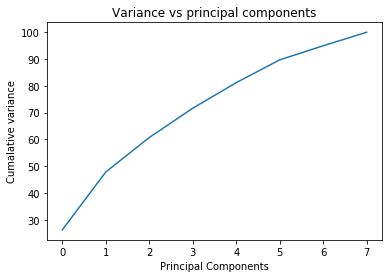

In [120]:
plt.title('Variance vs principal components')
# x-label
plt.xlabel('Principal Components')
# y-label
plt.ylabel('Cumalative variance')
plt.plot(var1)

By referring above plot we can infer that if we want to retain minimum 90% variance of original feature space then we can choose first 6 principal components. In other words this will reduce the feature space from 8D to 6D with 10% loss in information.<br>
However, we should apply PCA only when learning algorithm is very slow or we are getting memory issues due to very high-dimensional feature space.

### Data visualization in 2D and 3D:
One of the key advantage of PCA algorithm is data visualization.We can visualize the data in 2D and 3D dimensions by choosing first 2 and 3 components respectively.Though first 2 or 3 components may not represent the complete variance but it still helps as long as visualization is concerned.

In [122]:
principalDf = pd.DataFrame(data = Y_sklearn
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [123]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352


In [126]:
finalDf = pd.concat([principalDf,Y ], axis = 1)

In [127]:
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Outcome
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304,1
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215,0
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528,1
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648,0
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352,1


### 1st method to visualize in 2D

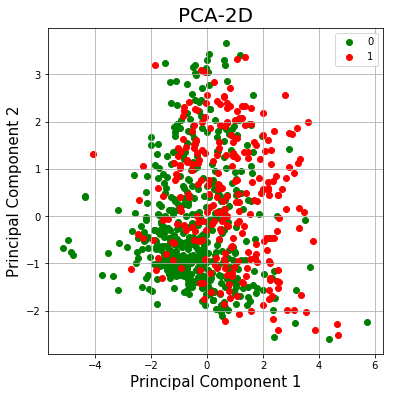

In [171]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA-2D', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
#ax.scatter([:,0][y == 0], Proj_data_2D[:,1][y == 0])
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               )
ax.legend(targets)
ax.grid()

### Second method to visualize in 2D

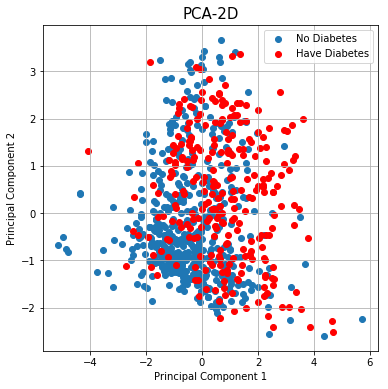

In [172]:
plt.figure(figsize = (6,6))
negative = plt.scatter(Y_sklearn[:,0][Y == 0], Y_sklearn[:,1][Y == 0])
positive = plt.scatter(Y_sklearn[:,0][Y == 1], Y_sklearn[:,1][Y == 1], color = "red")
plt.title('PCA-2D',fontsize = 15)
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.legend([negative,positive],["No Diabetes", "Have Diabetes"])
plt.grid()
plt.show()

### 3D Visualization 

In [156]:
from mpl_toolkits.mplot3d import Axes3D

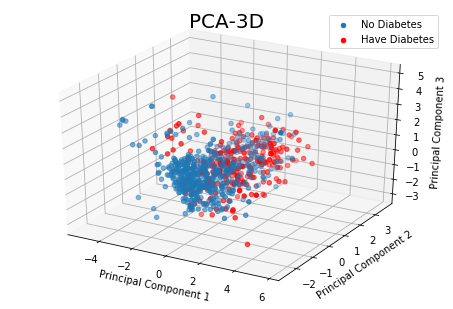

In [173]:
fig = plt.figure()
ax = Axes3D(fig)
negative = ax.scatter(Y_sklearn[:,0][Y == 0], Y_sklearn[:,1][Y == 0],Y_sklearn[:,2][Y == 0])
positive = ax.scatter(Y_sklearn[:,0][Y == 1], Y_sklearn[:,1][Y == 1],Y_sklearn[:,2][Y == 1], color = "red")
ax.set_title('PCA-3D',fontsize = 20)
ax.set_zlabel('Principal Component 3')
ax.set_ylabel('Principal Component 2')
ax.set_xlabel('Principal Component 1')
ax.legend([negative,positive],["No Diabetes", "Have Diabetes"])
plt.show()